In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Exploratory Data Analysis

In [26]:
df = pd.read_csv("/content/Customer-Churn-RT.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Drop Unnecesary columns

In [6]:
df = df.drop(["PhoneService", "customerID"], axis = 1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


#### Look at some unique values (Yes/No/No internet service)

In [7]:
df["OnlineSecurity"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [8]:
df["OnlineBackup"].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [9]:
df["DeviceProtection"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [10]:
df["StreamingTV"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

#### Change Total Charges Column to number

In [11]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna()

#### Encode Binary Object Variables for ML (Yes/No)

In [12]:
binary_cols = ["Partner", "Dependents", "PaperlessBilling", "Churn"]

for i in binary_cols:
    df[i] = df[i].map({"Yes": 1, "No": 0})

In [13]:
# our target variable
df["Churn"].value_counts()

,count
Churn,
0,5163
1,1869


#### Encode Gender

In [14]:
df["gender"] = df["gender"].map({"Male": 1, "Female": 0})

#### Encode Columns with (Yes / No / No internet service)

In [15]:
internet_cols = [
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies"]

for i in internet_cols:
    df[i] = df[i].replace({"No internet service": "No"})
    df[i] = df[i].map({"Yes": 1, "No": 0})

Encode MultipleLines (Yes / No / No phone service)

In [16]:
df["MultipleLines"] = df["MultipleLines"].replace({"No phone service": "No"})
df["MultipleLines"] = df["MultipleLines"].map({"Yes": 1, "No": 0})

Encode Multi-Category Variables (more than 2 categories) (One-Hot Encoding)

In [17]:
multi_cols = ["InternetService", "Contract", "PaymentMethod"]

df = pd.get_dummies(df, columns=multi_cols, drop_first=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   MultipleLines                          7032 non-null   int64  
 6   OnlineSecurity                         7032 non-null   int64  
 7   OnlineBackup                           7032 non-null   int64  
 8   DeviceProtection                       7032 non-null   int64  
 9   TechSupport                            7032 non-null   int64  
 10  StreamingTV                            7032 non-null   int64  
 11  Streaming

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

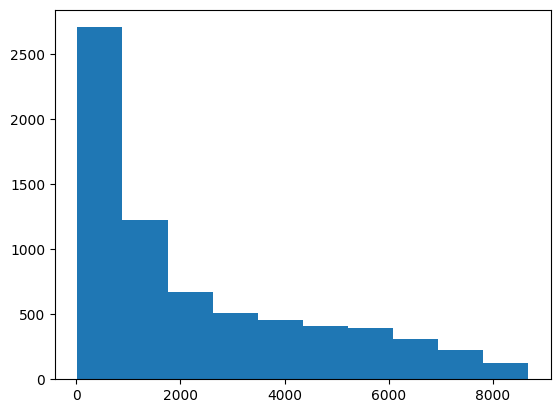

In [19]:
plt.hist(df["TotalCharges"])

# it is very right skewed (as thought in EDA) but when using Random Forest, XGBoost and Decision Trees we do not need to
# apply Log to the column as they dont assume linearity and are robust to skeweness.

## In-Sample Performance ML

#### Determine X and Y
- We have already prepared the data for ML by dropping and encoding columns on the dataset.

In [20]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

#### Evaluation Function

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

def classify(model):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42, stratify=y)

    # train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred) # Accuracy alone is not enough because of imbalance (there are way more 0 than 1)
    print("Accuracy:", acc)

    r_a_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print("ROC AUC SCORE:", r_a_score) # How well the model separates churners from non-churners

    print("-" * 30)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

### Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
classify(decision_tree_model)

Accuracy: 0.7093105899076049
ROC AUC SCORE: 0.6226581629747736
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1033
           1       0.45      0.44      0.45       374

    accuracy                           0.71      1407
   macro avg       0.63      0.62      0.62      1407
weighted avg       0.71      0.71      0.71      1407



- Accuracy: The model correctly classified 71% of all customers.
- Roc_auc: If we randomly pick 1 churn and 1 non-churn,
the model ranks them correctly 63% of the time.


### Random Forest
- builds a multitude of individual decision trees during training and merges their predictions to produce a more accurate and stable result than any single tree could achieve alone.

In [23]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=200)
classify(random_forest_model)

Accuracy: 0.7874911158493249
ROC AUC SCORE: 0.8198513234388185
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



- Accuracy: The model correctly classified 78% of all customers.
- Roc_Auc: If we randomly pick 1 churn and 1 non-churn,
the model ranks them correctly 82% of the time.

### XGBoost
- XGBoost builds trees sequentially.
Each new tree corrects the previous one.

In [24]:
from xgboost import XGBClassifier

xgboost_model = XGBClassifier( n_estimators=200,
    learning_rate=0.05, #controls how much each new tree contributes.
    max_depth=4, # How deep each tree can grow.
    use_label_encoder=False,
    eval_metric="logloss")

classify(xgboost_model)

Accuracy: 0.7910447761194029
ROC AUC SCORE: 0.8376787923653136
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



- Accuracy: The model correctly classified 79% of all customers.
- Roc_auc: If we randomly pick 1 churn and 1 non-churn,
the model ranks them correctly 84% of the time.

### Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y)

xgboost_model.fit(X_train, y_train)

y_pred = xgboost_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# Actual Non-Churn (0): 913 ✅, 120 ❌
# Actual Churn (1): 174 ❌, 200 ✅

Confusion Matrix:
[[913 120]
 [174 200]]


### Build a New XGBoost Model
- but out target variable is very biased (very low (1) accuracy), so we tweack the threshhold probability.

In [27]:
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    scale_pos_weight=2.7624, # 5163/1869 (non-churns/churns)
    use_label_encoder=False,
    eval_metric="logloss")

In [28]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [30]:
y_prob = xgb_model.predict_proba(X_test)[:, 1]
y_pred = (y_prob > 0.35).astype(int)

print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("-" * 40)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

ROC AUC: 0.8336642146077826
Accuracy: 0.6872778962331201
----------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.62      0.75      1033
           1       0.45      0.86      0.59       374

    accuracy                           0.69      1407
   macro avg       0.69      0.74      0.67      1407
weighted avg       0.80      0.69      0.71      1407

Confusion Matrix:

[[644 389]
 [ 51 323]]


Conclusion:
- We needed a model that could also spot churners (at-risk customers), because if we invest on them, it will be bad for business. So we decreased the threshhold to 0.35, to leave more space to (1). so the model could spot them easier.
- Improved churn detection by adjusting the XGBoost classification threshold from 0.50 to 0.35, increasing churn recall from 53% to 86%.
- Reduced missed churners (False Negatives) from 174 to 51, significantly improving the model’s ability to identify at-risk customers.
- Optimized model performance for imbalanced data by prioritizing recall over accuracy, achieving ROC-AUC ≈ 0.83.